In [2]:
# Imports

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from prep_image import prep_im_and_mask
from cut import cut_im_by_mask


In [3]:
im_path = 'test_images' + os.sep
mask_path = 'test_images_masks' + os.sep
im_id = 'PAT_1984_4038_265.png'

im, mask = prep_im_and_mask(im_id, im_path, mask_path)

cut_im = cut_im_by_mask(im, mask)

flat_im = np.reshape(cut_im, (-1, 3))

flat_im.shape

#plt.imshow(cut_im)

(237521, 3)

In [8]:
clusters = 5

k_means = KMeans(n_clusters=clusters, random_state=0)
k_means.fit(flat_im)

dom_colors = np.array(k_means.cluster_centers_, dtype='float32')

counts = np.unique(k_means.labels_, return_counts=True)[1]
percentages = counts / flat_im.shape[0]

p_and_c = zip(percentages, dom_colors)
p_and_c = sorted(p_and_c, reverse=True)

numpy.ndarray

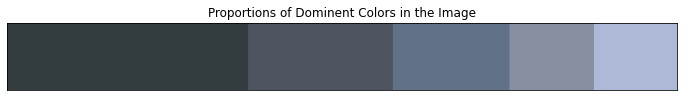

In [4]:
# Plot bar

bar = np.ones((50, 500, 3), dtype='float32')
plt.figure(figsize=(12,8))
plt.title('Proportions of Dominent Colors in the Image')
start = 0
i = 1
for percentage, color in p_and_c:
    end = start + int(percentage * bar.shape[1])
    if i == clusters:
        bar[:, start:] = color[::-1]
    else:
        bar[:, start:end] = color[::-1]
    start = end
    i += 1

plt.imshow(bar)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False)

In [5]:
from modules.dominance import color_dominance

im, mask = prep_im_and_mask(im_id, im_path, mask_path)

test = color_dominance(im, mask, clusters=5)
test

[(0.3617364359361909,
  array([0.25412259, 0.23938827, 0.20213637], dtype=float32)),
 (0.21648191107312617,
  array([0.3773046 , 0.33641246, 0.30721456], dtype=float32)),
 (0.1757528807979084,
  array([0.53416944, 0.44635752, 0.38167965], dtype=float32)),
 (0.12678036889369781,
  array([0.6340111 , 0.5631533 , 0.53189003], dtype=float32)),
 (0.11924840329907671,
  array([0.84388363, 0.72556096, 0.679199  ], dtype=float32))]